In [2]:
import pandas as pd #data structures & tools
import numpy as np #arrays & matrices
import scipy
import matplotlib # plots and graph
import seaborn as sns # plots: heat maps, time series, violin plots
#import scikit-learn #  
import statsmodels
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#import hdbscan

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha':0.5,'s':80, 'linewidths':0}

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#Replace default header 
headers = ['symboling','normalized-losses','make','fuel-type','aspiration',
           'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders',
           'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
           'peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df.head()
len(df)

205

In [5]:
#df.plot.scatter('x','y', figsize=(10,7), **plot_kwds)

In [6]:
# Convert data into a matrix
data = df.as_matrix()
data.shape

C:\Users\MikeLesKi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(205, 26)

In [7]:
#export data as csv
path="C:\\Users\\MikeLesKi\\Google Drive\\Data Analysis\\automobile.csv"
df.to_csv(path)

In [8]:
# Insights of the Dataset
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
# statistical summary
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
# statistical full summary
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [11]:
# provide concise summary of your df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [12]:
#Data pre-processing
#Dealing with missing values
#Drop missing values
# axis =0 rop the entire row
# axis =1 rop the entire column
# Inplace modifies the dataframe 
# without inplace the dataframe is not modified 
df.dropna(subset=["price"], axis=0, inplace=True)

In [13]:
# Now we want to convert the price variable type from 'object' to 'int64'
# But first we must replace de '?' character to NaN
df['price'].replace('?', np.nan, inplace=True)
# Then we convert to float64 since NaN can't be casted as a int64
df['price']=df['price'].astype('float64')
# We take the mean price and replace it in the missing values
mean_price=df['price'].mean()
df['price'].replace(np.nan,mean_price, inplace=True)
# Finally, we convert the prices to int64
df['price']=df['price'].astype('int64')

In [14]:
# Now we want to convert the price variable type from 'object' to 'int64'
# But first we must replace de '?' character to NaN
df['normalized-losses'].replace('?', np.nan, inplace=True)
# Then we convert to float64 since NaN can't be casted as a int64
df['normalized-losses']=df['normalized-losses'].astype('float64')
# We take the mean price and replace it in the missing values
mean=df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan,mean, inplace=True)
# Finally, we convert the prices to int64
df['normalized-losses']=df['normalized-losses'].astype('int64')

In [15]:
#Replace missing values with a specific value
# use dataframe.replace(missing_value, new_value)
# Replace normalize_losses w/ the mean
mean = df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan, mean)

0      122
1      122
2      122
3      164
4      164
5      122
6      158
7      122
8      158
9      122
10     192
11     192
12     188
13     188
14     122
15     122
16     122
17     122
18     121
19      98
20      81
21     118
22     118
23     118
24     148
25     148
26     148
27     148
28     110
29     145
      ... 
175     65
176     65
177     65
178    197
179    197
180     90
181    122
182    122
183    122
184     94
185     94
186     94
187     94
188     94
189    122
190    256
191    122
192    122
193    122
194    103
195     74
196    103
197     74
198    103
199     74
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int64

In [16]:
# Data Formatting
# convert "mpg" to "L/100km" in Car dataset.
df["city-mpg"]=235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100kn"}, inplace=True)

In [17]:
# Data Formatting
# convert data type to integer in column "price".
df["price"] = df["price"].astype("int")

In [18]:
# Data Normalization
# Uniform the features values with different range.
# To make statistical analysis simple.
# create similar value range.
# similar intrinsic influence on analytical model.
# Not normalized: hard to compare and one feature may influence 
# the result more (e.g. in linear regression analysis)
# Several approaches for normalization:
# 1. simple Feature scaling: divide each value by the max value 
# for that feature Xnew = Xold/Xmax
# 2. Min-Max: Xnew = Xold-Xmin/Xmax-Xmin range value from 0 to 1
# 3. Z-score: For each value, substract the mu the average 
# of the feature divide by the standar deviation of the feature sigma
# Xnew = Xold-mu/sigma range value between -3 and +3.

In [19]:
# Apply simple feature scaling in Car dataset.
df["length"] = df["length"]/df["length"].max()

In [20]:
# Apply Min-Max in Car dataset.
df["length"] = (df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())

In [21]:
# Apply Z-score in Car dataset.
df["length"] = (df["length"]-df["length"].mean())/df["length"].std()

In [22]:
# Binning
# Grouping of values into "bins"
# converts numeric into categorical variables
# "price" is a feature range from 5,000 to 45,000
# (in order to have a better representation of price) create three bins 
# low (5000 to 12000), mid (30000 to 31000), high (39000 to 44500)

In [23]:
# Apply binning in Car dataset on column price
bins = np.linspace(min(df["price"]), max(df["price"]),4)
group_names = ["Low","Medium","High"]
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)

In [24]:
# TURNING CATEGORICAL VARIABLES INTO QUANTITATIVE VARIABLES 
# Problem: Most statistical models cannot take in the objects/string as input
# Solution: Add dummy variables for each unique category
# Assign 0 or 1 in each category one hot encoding
# The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. 
# This creates a binary column for each category and returns a sparse matrix or dense array.

In [25]:
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


## Exploratory Data Analysis (EDA)
Preliminaries
- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between variables
- Extract important variables


Question: What are the characteristics that have the most impact on the car price?


### Descriptive Statistics
- Describe basic features of the data
- Giving short summaries about the sample and measures of the data

In [26]:
# Summarize statistics using pandas describe() method
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100kn,highway-mpg,price
count,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,1.802352e-15,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,13207.126829
std,1.245307,31.681008,6.021776,1.000000e+00,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,-2.670706e+00,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,-6.281176e-01,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,-6.883752e-02,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,7.336078e-01,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,256.000000,120.900000,2.759985e+00,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [29]:
# Summarize the categorical data is done by using the value_count() method
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name='drive-wheels'

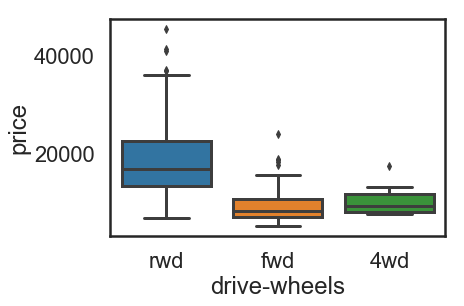

In [35]:
# Box Plots
# Find definitions
sns.boxplot(x='drive-wheels',y='price', data=df)

Text(0, 0.5, 'Price')

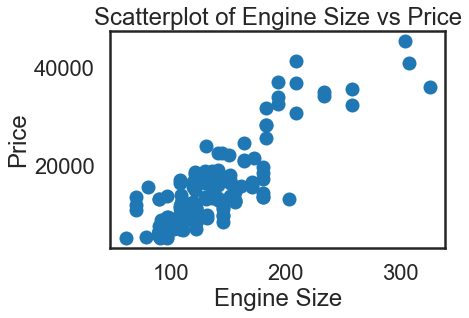

In [36]:
# Scatter Plot
# Each observation represented as a point.
# Scatter plot show the relationship between two variables.
# 1. Predictor/Independent variables on x-axis.
# 2. Target/dependent variables on y-axis.
# Matplotlib function scatter used
x=df["engine-size"]
y=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
# As the engine size goes up, the price goes up as well
# Positive (correlation) linear relationship between both variables